# Programming Exercise 5: Regularized Linear Regression and Bias v.s. Variance


In this exercise, you will implement regularized linear regression and use it to study models with different bias-variance properties. Before starting on the programming exercise, we strongly recommend watching the video lectures and completing the review questions for the associated topics.

Throughout this exercise you have to complete the following functions: 

- linearRegCostFunction.m - Regularized linear regression cost function
- learningCurve.m - Generates a learning curve
- polyFeatures.m - Maps data into polynomial feature space 
- validationCurve.m - Generates a cross validation curve

**Instructions**:

For each function, we have provided starter code for you. You will find a description of the problems followed by a cell which contains some code. You will have to write your own code in these cells to complete the four functions mentioned above. Once you run the cells, your output would be displayed. If it matches the expected output, then you should continue with the next part of the exercise, else, you would have to try again. 

Please read the [Notebook FAQ](https://www.coursera.org/learn/machine-learning/supplement/S9fb6/jupyter-notebook-faq) to get familiar with the Jupyter environment and the commands. We also highly recommend going to your workspace to explore the files you will be working with before starting the exercise.

To go to the workspace: press on File ==> Open.

### NOTE:
You will find cells which contain the comment % GRADED FUNCTION: functionName. Do not edit that comment. Those cells will be used to grade your assignment. Each block of code with that comment should only have the function. 


#### After submitting your assignment, you can [check your grades here](https://www.coursera.org/learn/machine-learning/programming/Jgxgf/reg-linear-regression-bias-vs-variance-grader). 

## Regularized Linear Regression

In the first half of the exercise, you will implement regularized linear regression to predict the amount of water flowing out of a dam using the change of water level in a reservoir. In the next half, you will go through some diagnostics of debugging learning algorithms and examine the effects of bias v.s. variance.
You will be provided with instructions as you complete this exercise. 
Visualizing the dataset
-----------------------

We will begin by visualizing the dataset containing historical records
on the change in the water level, $x$, and the amount of water flowing
out of the dam, $y$.

This dataset is divided into three parts:

-   A **training** set that your model will learn on: $X, y$

-   A **cross validation** set for determining the regularization
    parameter: $X$val, $y$val

-   A **test** set for evaluating performance. These are “unseen”
    examples which your model did not see during training: $Xtest,
    ytest$

Below, we will plot the training data (Figure
1). In the following parts, you will implement linear
regression and use that to fit a straight line to the data and plot
learning curves. Following that, you will implement polynomial
regression to find a better fit to the data.

<img src="../readonly/Assignment5/figure 1.png" width="450" height="450">

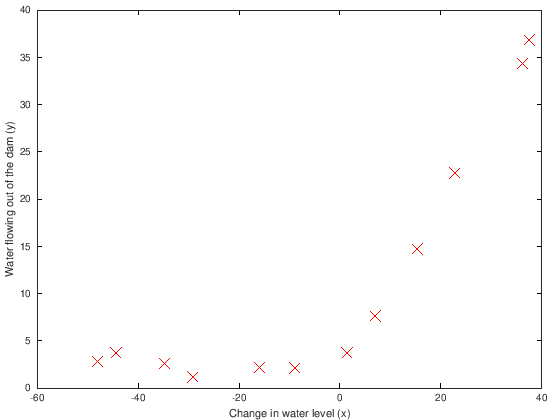

In [42]:
warning('off'); addpath('../readonly/Assignment5/'); load ('ex5data1.mat');
m = size(X, 1);                                         % m = Number of examples

plot(X, y, 'rx', 'MarkerSize', 10, 'LineWidth', 1.5);   % Plot training data
xlabel('Change in water level (x)');
ylabel('Water flowing out of the dam (y)');

## Regularized linear regression 

#### Cost Function


Recall that regularized linear regression has the following cost
function:

$$J(\theta)  =  \frac{{1}}{2m}\left(\sum_{i=1}^{m}(h_{\theta}(x^{(i)})-y^{(i)})^{2}\right)+\frac{\lambda}{2m}\left(\sum_{j=1}^{n}\theta_{j}^{2}\right)\tag{1}$$

where $\lambda$ is a regularization parameter which controls the degree
of regularization (helps prevent overfitting) and $h(\theta) = X\theta$. The
regularization term puts a penalty on the overal cost $J$. As the
magnitudes of the model parameters $\theta_j$ increase, the penalty
increases as well. **Note that you should not regularize the $\theta_0$
term.** (In Octave/MATLAB, the $\theta_0$ term is represented as
theta(1) since indexing in Octave/MATLAB starts from 1).

You should now complete the code in the
linearRegCostFunction. Your task is to write a function to
calculate the regularized linear regression cost function. If possible,
try to vectorize your code and avoid writing loops. When you are
finished, we will run your cost function
using theta initialized at [1; 1]. 


# Gradient

Correspondingly, the partial derivative of regularized linear
regression’s cost for $\theta_j$ is defined as

$$\frac{\partial J(\theta)}{\partial\theta_0} = \frac{1}{m}  \sum_{i=1}^m (h_{\theta}(x^{(i)}) - y^{(i)}) x_j^{(i)} \quad\quad\quad\quad\quad\quad \mbox{for $j = 0$}\tag{2}$$

$$\frac{\partial J(\theta)}{\partial\theta_j} = \left( \frac{1}{m}  \sum_{i=1}^m (h_{\theta}(x^{(i)}) - y^{(i)}) x_j^{(i)} \right) + \frac{\lambda}{m} \theta_j  \quad\, \mbox{for $j \geq 1$}\tag{3}$$

In linearRegCostFunction, add code to calculate the gradient,
returning it in the variable grad. When you are finished, the
next part  will run your gradient function using
theta initialized at [1; 1]. 

**Implementation:**

**[J, grad] = linearRegCostFunction(X, y, theta, lambda)** computes the 
cost of using theta as the parameter for linear regression to fit the 
data points in X and y. It returns the cost in J and the gradient in grad.

In [43]:
% GRADED FUNCTION: linearRegCostFunction
function [J, grad] = linearRegCostFunction(X, y, theta, lambda)

m = length(y);                         % number of training examples
                                       % Return the following variables correctly 
J = 0;
grad = zeros(size(theta));

% ====================== YOUR CODE HERE ======================
h = X * theta;
basic_J = 1 / (2 * m) * sum((h - y).^2);
reg_J = lambda/(2*m) * sum((theta'(:,2:end)).^2);
J = basic_J + reg_J;

grad = 1/m * (X' * (h - y));
grad_theta = [0 theta'(:,2:end)];
reg_grad = (lambda/m * grad_theta)';
grad = grad + reg_grad;

% ============================================================
grad = grad(:);
end



In [44]:
% Evaluate the Cost and the gradient
theta = [1 ; 1];
[J grad] = linearRegCostFunction([ones(m, 1) X], y, theta, 1)

J =  303.99
grad =

   -15.303
   598.251



**Expected Cost and Gradient**

J = 303.993.

grad = [-15.30; 598.25]

Fitting linear regression
-------------------------

Once your cost function and gradient are working correctly, the next
part will run the code in trainLinearReg to
compute the optimal values of $\theta$. This training function uses
fmincg to optimize the cost function.

In this part, we set regularization parameter $\lambda$ to zero. Because
our current implementation of linear regression is trying to fit a
2-dimensional $\theta$, regularization will not be incredibly helpful
for a $\theta$ of such low dimension. In the later parts of the
exercise, you will be using polynomial regression with regularization.

Finally, we will also plot the best fit line,
resulting in an image similar to Figure 2. The best
fit line tells us that the model is not a good fit to the data because
the data has a non-linear pattern. While visualizing the best fit as
shown is one possible way to debug your learning algorithm, it is not
always easy to visualize the data and model. In the next section, you
will implement a function to generate learning curves that can help you
debug your learning algorithm even if it is not easy to visualize the
data.
<img src="../readonly/Assignment5/figure 2.png" width="450" height="450">

You do not have to write any code. The data is non-linear, so this will not give a great fit. Run the cell below to see a similar plot. 

Iteration     2 | Cost: 2.237391e+01


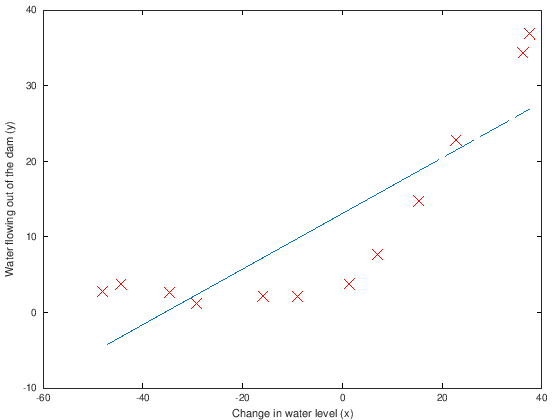

In [45]:
lambda = 0;                                             %  Train linear regression with lambda = 0
[theta] = trainLinearReg([ones(m, 1) X], y, lambda);

plot(X, y, 'rx', 'MarkerSize', 10, 'LineWidth', 1.5);   %  Plot fit over the data
xlabel('Change in water level (x)');
ylabel('Water flowing out of the dam (y)');
hold on;
plot(X, [ones(m, 1) X]*theta, '--', 'LineWidth', 2)
hold off;

Bias-variance
=============

An important concept in machine learning is the bias-variance tradeoff.
Models with high bias are not complex enough for the data and tend to
underfit, while models with high variance overfit to the training data.

In this part of the exercise, you will plot training and test errors on
a learning curve to diagnose bias-variance problems.

Learning curves
---------------

You will now implement code to generate the learning curves that will be
useful in debugging learning algorithms. Recall that a learning curve
plots training and cross validation error as a function of training set
size. Your job is to fill in the learningCurve function so that it returns a
vector of errors for the training set and the cross validation set.

To plot the learning curve, we need a training and cross validation set
error for different *training* set sizes. To obtain different training
set sizes, you should use different subsets of the original training set
$X$. Specifically, for a training set size of $i$, you should
use the first i examples (i.e., $X(1:i,:)$ and $y(1:i)$).

You can use the trainLinearReg function to find the $\theta$
parameters. Note that the **lambda** is passed as a parameter to the
**learningCurve** function. After learning the $\theta$ parameters,
you should compute the **error** on the training and cross validation
sets. Recall that the training error for a dataset is defined as

$$J_{\mathrm{train}}(\theta)  =  \frac{{1}}{2m}\left[\sum_{i=1}^{m}(h_{\theta}(x^{(i)})-y^{(i)})^{2}\right].$$

In particular, note that the training error does not include the
regularization term. One way to compute the training error is to use
your existing cost function and set $\lambda$ to 0 *only* when using it
to compute the training error and cross validation error. When you are
computing the training set error, make sure you compute it on the
training subset (i.e., $X(1:n,:)$ and $y(1:n)$) (instead of
the entire training set). However, for the cross validation error, you
should compute it over the *entire* cross validation set. You should
store the computed errors in the vectors **error_train** and
**error_val.**

When you are finished, we will print the learning curves and
produce a plot similar to the image below.

<img src="../readonly/Assignment5/figure 3.png" width="450" height="450">

You can observe that *both* the
train error and cross validation error are high when the number of
training examples is increased. This reflects a **high bias** problem in
the model – the linear regression model is too simple and is unable to
fit our dataset well. In the next section, you will implement polynomial
regression to fit a better model for this dataset.

**Implementation**: 


**[error_train, error_val] =
       leanrningCurve(X, y, Xval, yval, lambda)** returns the train and
       cross validation set errors for a learning curve. In particular, 
       it returns two vectors of the same length: **error_train** and 
       **error_val**. **error_train(i)** contains the training error for
       i examples (and similarly for **error_val(i)**). In this function, you will compute the train and test errors for
   dataset sizes from 1 up to m. In practice, when working with larger
   datasets, you might want to do this in larger intervals. For the cross-validation error, you should instead evaluate on
the _entire_ cross validation set ($X$val and $y$val). 

**Note:** To get your theta parameters, you should use the trainLinearReg function we have provided for you. You could scroll up to see how we used it. Once you have your theta, you could use your cost function (linearRegCostFunction)
     to compute the training and cross validation error. You should 
     call the linearRegCostFunction with the lambda argument set to 0.
     Do note that you will still need to use lambda when running
     the training to obtain the theta parameters. You might want to loop over the examples and store the results in error_train and error_val.


In [95]:
% GRADED FUNCTION: learningCurve
function [error_train, error_val] = ...
    learningCurve(X, y, Xval, yval, lambda)

% Number of training examples
m = size(X, 1);

% You need to return these values correctly
error_train = zeros(m, 1);
error_val   = zeros(m, 1);

% ====================== YOUR CODE HERE ======================
for i = 1:m,
  X_train = X(1:i, :);
  y_train = y(1:i);

  theta = trainLinearReg(X_train, y_train, lambda);

  error_train(i) = linearRegCostFunction(X_train, y_train, theta, 0);  
  error_val(i) = linearRegCostFunction(Xval, yval, theta, 0);
end
% ============================================================

end

Iteration     3 | Cost: 0.000000e+00
Iteration     3 | Cost: 9.860761e-32
Iteration     7 | Cost: 3.286595e+00
Iteration    25 | Cost: 2.842678e+00
Iteration    29 | Cost: 1.315405e+01
Iteration    36 | Cost: 1.944396e+01
Iteration    13 | Cost: 2.009852e+01
Iteration    30 | Cost: 1.817286e+01
Iteration     8 | Cost: 2.260941e+01
Iteration    17 | Cost: 2.326146e+01
Iteration    17 | Cost: 2.431725e+01
Iteration     2 | Cost: 2.237391e+01
# Training Examples	Train Error	Cross Validation Error
  	1		0.000000	205.121096
  	2		0.000000	110.300366
  	3		3.286595	45.010231
  	4		2.842678	48.368911
  	5		13.154049	35.865165
  	6		19.443963	33.829962
  	7		20.098522	31.970986
  	8		18.172859	30.862446
  	9		22.609405	31.135998
  	10		23.261462	28.936207
  	11		24.317250	29.551432
  	12		22.373906	29.433818


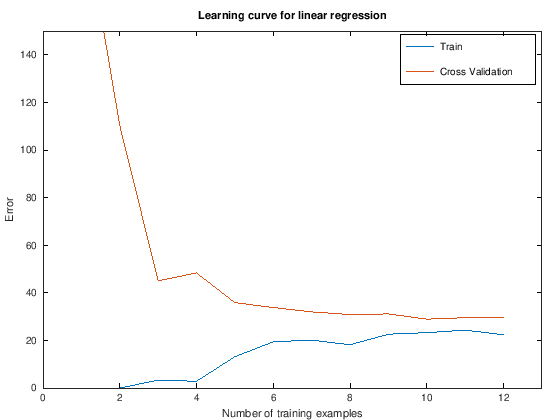

In [96]:
% Plotting your results
warning("off", "all");                         % Turn off the warnings to avoid fmincg errors - Don't worry about it! 
lambda = 0;
[error_train, error_val] = ...
learningCurve([ones(m, 1) X], y, ...
                  [ones(size(Xval, 1), 1) Xval], yval, ...
                  lambda);
plot(1:m, error_train, 1:m, error_val);
title('Learning curve for linear regression')
legend('Train', 'Cross Validation')
xlabel('Number of training examples')
ylabel('Error')
axis([0 13 0 150])

fprintf('# Training Examples\tTrain Error\tCross Validation Error\n');
for i = 1:m
    fprintf('  \t%d\t\t%f\t%f\n', i, error_train(i), error_val(i));
end

Polynomial regression
=====================

The problem with our linear model was that it was too simple for the
data and resulted in underfitting (high bias). In this part of the
exercise, you will address this problem by adding more features.

In the polynomial regression, our hypothesis has the form:

$$\begin{aligned}
h_\theta(x) &= \theta_0 + \theta_1*(\mathrm{waterLevel}) + \theta_2* (\mathrm{waterLevel})^2 + \dots + \theta_p*(\mathrm{waterLevel})^p \\
&= \theta_0 + \theta_1x_1 + \theta_2x_2 + ... + \theta_p x_p.\end{aligned}$$

Notice that by defining
$x_1 = (\mathrm{waterLevel}), x_2=(\mathrm{waterLevel})^2, \dots, x_p = (\mathrm{waterLevel})^p$,
we obtain a linear regression model where the features are the various
powers of the original value $(\mathrm{waterLevel})$.

Now, you will add more features using the higher powers of the existing
feature $x$ in the dataset. Your task in this part is to complete the
code in polyFeatures so that the function maps the original
training set $X$ of size $m\times1$ into its higher powers.
Specifically, when a training set $X$ of size $m \times 1$ is
passed into the function, the function should return an $m \times p$
matrix $X$_poly, where column 1 holds the original values of
$X$, column 2 holds the values of $X.^2$, column 3 holds the
values of $X.^3$, and so on. Note that you don’t have to account
for the zero-eth power in this function.

Now you have a function that will map features to a higher dimension,
and below we will apply it to the training set, the test
set, and the cross validation set (which you haven’t used yet).

**Implementation**:

polyFeatures Maps X (1D vector) to the p-th power
   [X_poly] = polyFeatures(X, p) takes a data matrix X (size m x 1) and
   maps each example into its polynomial features where
   
   
   $$X_{poly}(i, :) = [x_i \quad x_i^2 \quad x_i^3 \quad ...  \quad x_i^p]$$

Instructions: Given a vector X, return a matrix X_poly where the p-th 
              column of X contains the values of X to the p-th power.




In [73]:
% GRADED FUNCTION: polyFeatures
function [X_poly] = polyFeatures(X, p)

X_poly = zeros(numel(X), p);                             % You need to return the following variables correctly.

% ====================== YOUR CODE HERE ======================
for i = 1:p
    X_poly(:,i) = X.^i;
end

% ============================================================

end

Learning Polynomial Regression
------------------------------

After you have completed polyFeatures, we
will proceed to train polynomial regression using your linear regression
cost function.

Keep in mind that even though we have polynomial terms in our feature
vector, we are still solving a linear regression optimization problem.
The polynomial terms have simply turned into features that we can use
for linear regression. We are using the same cost function and gradient
that you wrote for the earlier part of this exercise.

For this part of the exercise, you will be using a polynomial of degree
8. It turns out that if we run the training directly on the projected
data, it will not work well as the features would be badly scaled (e.g., an
example with $x=40$ will now have a feature
$x_8 = 40^8 = 6.5 \times 10^{12}$). Therefore, you will need to use
feature normalization.

Before learning the parameters $\theta$ for the polynomial regression,
we will first call featureNormalize and normalize the
features of the training set, storing the **mu, sigma** parameters
separately. We have already implemented this function for you and it is
the same function from the first exercise.

After learning the parameters $\theta$, you should see two plots (Figure
4, 5) generated for polynomial regression with $\lambda = 0$.

<table><tr><td><img src="../readonly/Assignment5/figure 4.png" width="450" height="450"></td><td><img src="../readonly/Assignment5/figure 5.png" width="450" height="450"></td></tr></table>


From Figure 4, you should see that the polynomial
fit is able to follow the datapoints very well - thus, obtaining a low
training error. However, the polynomial fit is very complex and even
drops off at the extremes. Depending on which software you are using, the second tail of figure 4 could either drop as shown or go up in an exponential way. Either way, this is an indicator that the polynomial
regression model is overfitting the training data and will not
generalize well.

To better understand the problems with the unregularized ($\lambda=0$)
model, you can see that the learning curve (Figure 5) shows the same effect where the low
training error is low, but the cross validation error is high. There is
a gap between the training and cross validation errors, indicating a
high variance problem.

One way to combat the overfitting (high-variance) problem is to add
regularization to the model. In the next section, you will get to try
different $\lambda$ parameters to see how regularization can lead to a
better model.

In [74]:
p = 8;                                           % Testing your function
X_poly = polyFeatures(X, p);                     % Map X onto Polynomial Features and Normalize
[X_poly, mu, sigma] = featureNormalize(X_poly);  % Normalize
X_poly = [ones(m, 1), X_poly];                   % Add Ones

                                                 % Map X_poly_test and normalize (using mu and sigma)
X_poly_test = polyFeatures(Xtest, p);
X_poly_test = bsxfun(@minus, X_poly_test, mu);
X_poly_test = bsxfun(@rdivide, X_poly_test, sigma);
X_poly_test = [ones(size(X_poly_test, 1), 1), X_poly_test];         % Add Ones

X_poly_val = polyFeatures(Xval, p);               % Map X_poly_val and normalize (using mu and sigma)
X_poly_val = bsxfun(@minus, X_poly_val, mu);
X_poly_val = bsxfun(@rdivide, X_poly_val, sigma);
X_poly_val = [ones(size(X_poly_val, 1), 1), X_poly_val];           % Add Ones

fprintf('Normalized Training Example 1:\n');
fprintf('  %f  \n', X_poly(1, :));

Normalized Training Example 1:
  1.000000  
  -0.362141  
  -0.755087  
  0.182226  
  -0.706190  
  0.306618  
  -0.590878  
  0.344516  
  -0.508481  


## Adjusting the Regularization Parameter

Now, you will get to experiment with polynomial regression with multiplevalues of lambda. The code below runs polynomial regression with lambda = 0. You should try running the code with different values oflambda to see how the fit and learning curve change.

Iteration    63 | Cost: 7.268148e+00
Iteration    14 | Cost: 1.206934e-31
Iteration    21 | Cost: 7.269436e-02
Iteration    28 | Cost: 1.849879e+01
Iteration    46 | Cost: 1.457586e+01
Iteration    50 | Cost: 1.166072e+01
Iteration    57 | Cost: 1.011882e+01
Iteration    59 | Cost: 9.416317e+00
Iteration    57 | Cost: 8.256224e+00
Iteration    55 | Cost: 7.802076e+00
Iteration    70 | Cost: 7.064398e+00
Iteration    63 | Cost: 6.423784e+00
Iteration    63 | Cost: 7.268148e+00
lambda =  1
# Training Examples	Train Error	Cross Validation Error
  	1		0.000000	2.072427
  	2		0.072694	2.635321
  	3		18.498793	17.901463
  	4		14.575864	21.659335
  	5		11.660715	17.990608
  	6		10.118820	16.227913
  	7		9.416317	14.039288
  	8		8.256224	12.297241
  	9		7.802076	11.499310
  	10		7.064398	10.275608
  	11		6.423784	9.452333
  	12		7.268148	8.983808


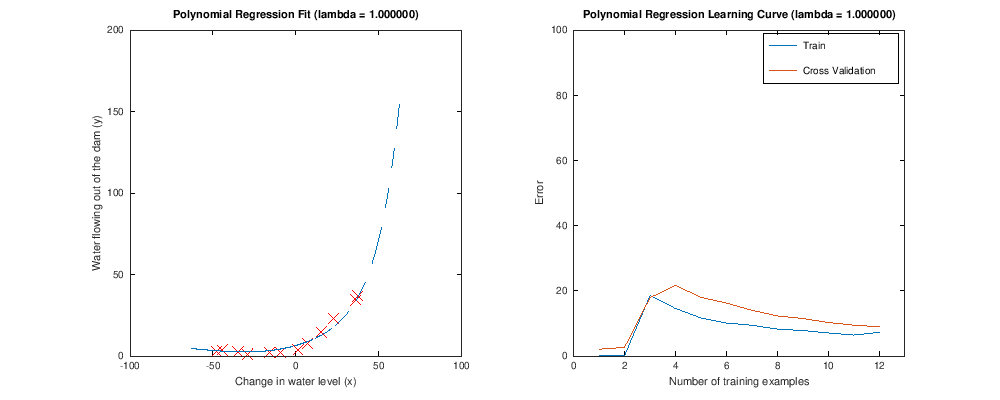

In [75]:
lambda = 1;
[theta] = trainLinearReg(X_poly, y, lambda);

figure('Position',[0,0,1000,400]);
subplot (1, 2, 1)

plot(X, y, 'rx', 'MarkerSize', 10, 'LineWidth', 1.5);
plotFit(min(X), max(X), mu, sigma, theta, p);
xlabel('Change in water level (x)');
ylabel('Water flowing out of the dam (y)');
title (sprintf('Polynomial Regression Fit (lambda = %f)', lambda));

subplot (1, 2, 2)
[error_train, error_val] = ...
    learningCurve(X_poly, y, X_poly_val, yval, lambda);
plot(1:m, error_train, 1:m, error_val);

title(sprintf('Polynomial Regression Learning Curve (lambda = %f)', lambda));
xlabel('Number of training examples')
ylabel('Error')
axis([0 13 0 100])
legend('Train', 'Cross Validation')

lambda
fprintf('# Training Examples\tTrain Error\tCross Validation Error\n');
for i = 1:m
    fprintf('  \t%d\t\t%f\t%f\n', i, error_train(i), error_val(i));
end


Optional (ungraded) exercise: Adjusting the regularization parameter
--------------------------------------------------------------------

In this section, you will get to observe how the regularization
parameter affects the bias-variance of regularized polynomial
regression. You should now modify the lambda parameter above and try $\lambda = 1, 100$. For each of these values, the
script should generate a polynomial fit to the data and also a learning
curve.

For $\lambda=1$, you should see a polynomial fit that follows the data
trend well (Figure 6) and a learning curve
(Figure 7) showing that both the cross
validation and training error converge to a relatively low value. This
shows the $\lambda=1$ regularized polynomial regression model does not
have the high-bias or high-variance problems. In effect, it achieves a
good trade-off between bias and variance.

<table><tr><td><img src="../readonly/Assignment5/figure 6.png" width="450" height="450"></td><td><img src="../readonly/Assignment5/figure 7.png" width="450" height="450"></td><td><img src="../readonly/Assignment5/figure 8.png" width="450" height="450"></td></tr></table>

For $\lambda=100$, you should see a polynomial fit (Figure 8) that does not follow the data well. In this
case, there is too much regularization and the model is unable to fit
the training data. Change the lambda value in the cell above to see these graphs. 


Selecting $\lambda$ using a cross validation set
------------------------------------------------

From the previous parts of the exercise, you observed that the value of
$\lambda$ can significantly affect the results of regularized polynomial
regression on the training and cross validation set. In particular, a
model without regularization ($\lambda=0$) fits the training set well,
but does not generalize. Conversely, a model with too much
regularization ($\lambda = 100$) does not fit the training set and
testing set well. A good choice of $\lambda$ (e.g., $\lambda=1$) can
provide a good fit to the data.

In this section, you will implement an automated method to select the
$\lambda$ parameter. Concretely, you will use a cross validation set to
evaluate how good each $\lambda$ value is. After selecting the best
$\lambda$ value using the cross validation set, we can then evaluate the
model on the test set to estimate how well the model will perform on
actual unseen data.

Your task is to complete the code in the **validationCurve** function below.
Specifically, you should use the **trainLinearReg** function
to train the model using different values of $\lambda$ and compute the
training error and cross validation error. You should try $\lambda$ in
the following range: $\{0, 0.001, 0.003, 0.01, 0.03,
0.1, 0.3, 1, 3, 10\}$.

<img src="../readonly/Assignment5/figure 9.png" width="450" height="450">

After you have completed the code, the next part will
run your function and plot a cross validation curve of error v.s.
$\lambda$ that allows you to select which $\lambda$ parameter to use. You
should see a plot similar to Figure 9. In this figure, we
can see that the best value of $\lambda$ is around 3. Due to randomness
in the training and validation splits of the dataset, the cross
validation error can sometimes be lower than the training error.

**Implementation**

validationCurve generates the train and validation errors needed to
plot a validation curve that we can use to select lambda
  ** [lambda_vec, error_train, error_val] = ...
       VALIDATIONCURVE(X, y, Xval, yval)** returns the train
       and validation errors (in error_train, error_val)
       for different values of lambda. You are given the training set (X,
       y) and validation set (Xval, yval).


You have to fill in this function to return training errors in 
              error_train and the validation errors in error_val. The 
              vector lambda_vec contains the different lambda parameters 
              to use for each calculation of the errors, i.e, 
              error_train(i), and error_val(i) should give 
              you the errors obtained after training with 
              lambda = lambda_vec(i)
              

In [103]:
% GRADED FUNCTION: validationCurve
function [lambda_vec, error_train, error_val] = ...
    validationCurve(X, y, Xval, yval)

% Selected values of lambda (you should not change this)
lambda_vec = [0 0.001 0.003 0.01 0.03 0.1 0.3 1 3 10]';

% You need to return these variables correctly.
error_train = zeros(length(lambda_vec), 1);
error_val = zeros(length(lambda_vec), 1);

% ====================== YOUR CODE HERE ======================
X_train = X;
y_train = y;

for i = 1:length(lambda_vec)
    lambda = lambda_vec(i);
    theta = trainLinearReg(X_train, y_train, lambda);

    error_train(i) = linearRegCostFunction(X_train, y_train, theta, 0);
    error_val(i) = linearRegCostFunction(Xval, yval, theta, 0);
end

% =============================================================
end


Iteration   200 | Cost: 1.468320e-01
Iteration   200 | Cost: 1.909385e-01
Iteration   200 | Cost: 2.539985e-01
Iteration   200 | Cost: 3.851421e-01
Iteration   200 | Cost: 6.692749e-01
Iteration   173 | Cost: 1.443470e+00
Iteration   100 | Cost: 3.101591e+00
Iteration    63 | Cost: 7.268148e+00
Iteration    36 | Cost: 1.586769e+01
Iteration    23 | Cost: 3.337220e+01
lambda		Train Error	Validation Error
 0.000000	0.146832	16.680859
 0.001000	0.159289	16.071683
 0.003000	0.190288	19.536625
 0.010000	0.223231	17.178290
 0.030000	0.281851	12.829070
 0.100000	0.459318	7.587013
 0.300000	0.921760	4.636833
 1.000000	2.076188	4.260626
 3.000000	4.901351	3.822907
 10.000000	16.092213	9.945509


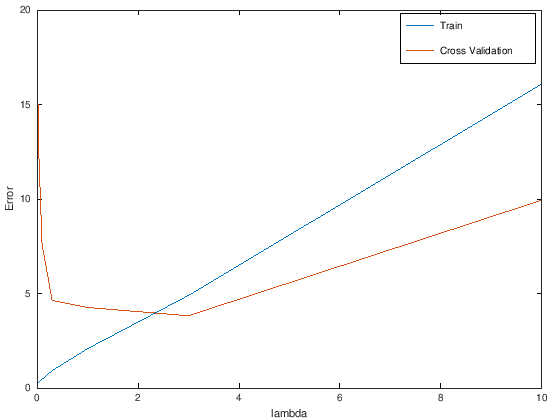

In [104]:
% Testing your function for various lambda values
% to finally select the best lambda.

[lambda_vec, error_train, error_val] = ...
    validationCurve(X_poly, y, X_poly_val, yval);

close all;
plot(lambda_vec, error_train, lambda_vec, error_val);
legend('Train', 'Cross Validation');
xlabel('lambda');
ylabel('Error');

fprintf('lambda\t\tTrain Error\tValidation Error\n');
for i = 1:length(lambda_vec)
	fprintf(' %f\t%f\t%f\n', ...
            lambda_vec(i), error_train(i), error_val(i));
end


Optional (ungraded) exercise: Computing test set error
------------------------------------------------------

In the previous part of the exercise, you implemented code to compute
the cross validation error for various values of the regularization
parameter $\lambda$. However, to get a better indication of the model’s
performance in the real world, it is important to evaluate the “final”
model on a test set that was not used in any part of training (that is,
it was neither used to select the $\lambda$ parameters, nor to learn the
model parameters $\theta$).

For this optional (ungraded) exercise, you should compute the test error
using the best value of $\lambda$ you found. In our cross validation, we
obtained a test error of 3.8599 for $\lambda=3$.

In [ ]:
% Use this cell to do it if you want


Optional (ungraded) exercise: Plotting learning curves with randomly selected examples
--------------------------------------------------------------------------------------

In practice, especially for small training sets, when you plot learning
curves to debug your algorithms, it is often helpful to average across
multiple sets of randomly selected examples to determine the training
error and cross validation error.

Concretely, to determine the training error and cross validation error
for $i$ examples, you should first randomly select $i$ examples from the
training set and $i$ examples from the cross validation set. You will
then learn the parameters $\theta$ using the randomly chosen training
set and evaluate the parameters $\theta$ on the randomly chosen training
set and cross validation set. The above steps should then be repeated
multiple times (say 50) and the averaged error should be used to
determine the training error and cross validation error for $i$
examples.

<img src="../readonly/Assignment5/figure 10.png" width="600" height="600">



For this optional (ungraded) exercise, you should implement the above
strategy for computing the learning curves. For reference, figure
10 shows the learning curve we obtained
for polynomial regression with $\lambda = 0.01$. Your figure may differ
slightly due to the random selection of examples.

In [ ]:
% Use this cell to do it if you want
